In [1]:
##Import Libraries
import seaborn as sns
import nltk
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report as cr
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
##Read .csv as Pandas DF
IMDB_Reviews = pd.read_csv('/Users/colinstets/Documents/Fellowship_ai/NLP/IMDB_Dataset.csv')

In [3]:
IMDB_Reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
#Example Review
IMDB_Reviews['review'].loc[597]

'In short if you want to watch Burt Reynolds best films than this one must be included. If you don\'t like Burt you may still like this. If you love Burt this may become one of your favorite movies of all time! Being from Atlanta it does hit home but it\'s also nice to see a cop/action/drama that takes place somewhere other than NY City, Chicago, Miami, or LA. The film is funny at points with & good plot & good performances from a great supporting cast (every character is real & the bad guys are not so one sided they are really well thought out)A nice offbeat romance in the 2nd half & it has some good old fashion shootouts & fistfights (no CGI thank God REAL ACTION!)<br /><br />If Clint Eastwood did his best impression of a Burt Reynolds movie with "Every Which Way But Loose" & "Any Which Way You Can" then Burt responded with his best Clint type flick with this, & it comes off great!'

In [5]:
#Download Stop-Words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colinstets/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<AxesSubplot:xlabel='sentiment', ylabel='count'>

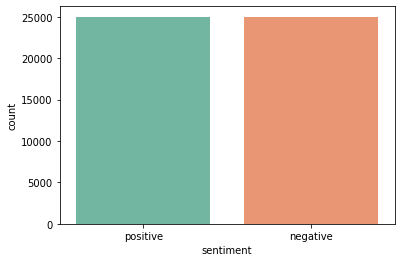

In [6]:
##Vizualize Dataset Sentiment
sns.countplot(x='sentiment',palette = 'Set2' , data=IMDB_Reviews)

In [7]:
#PortStemmer
ps = PorterStemmer()

In [8]:
##Create corpus and remove stopwords
corpus = []
for i in range(0,len(IMDB_Reviews)):
    review = re.sub('[^a-zA-Z]',' ',IMDB_Reviews['review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
# Creating a bag of words model
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [10]:
y = pd.get_dummies(IMDB_Reviews['sentiment'])
y = y.iloc[:,1].values

In [11]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
#Train Multinomial Naive Bayes model on lemmatized bag of words model
text_analysis_model = MultinomialNB().fit(X_train,y_train)

In [13]:
#generate predictions
y_pred = text_analysis_model.predict(X_test)

In [14]:
#Get accuracy scores for naive bayes with stemming
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.83872
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6291
           1       0.84      0.84      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [15]:
#Train random forest classifier on lemmatized bag of words model
classifer = RandomForestClassifier().fit(X_train,y_train)

In [16]:
#generate predictions
y_pred2 = classifer.predict(X_test)

In [17]:
#Get accuracy scores for random forest with stemming
score = accuracy_score(y_test,y_pred2)
print(score)
print(cr(y_test,y_pred2))

0.84168
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6291
           1       0.85      0.83      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [19]:
#Lemmatization
lemmatizer=WordNetLemmatizer()

In [20]:
##Create corpus and remove stopwords
corpus = []
for i in range(0, len(IMDB_Reviews)):
    review = re.sub('[^a-zA-Z]', ' ', IMDB_Reviews['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
#Create Bag of Words model
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [23]:
#Get dummy variables for sentiment categorical variables
y = pd.get_dummies(IMDB_Reviews['sentiment'])
y = y.iloc[:,1].values

In [24]:
#train / test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
#Multinomial naive bayes model with lemmatization
text_analysis_model2 = MultinomialNB().fit(X_train,y_train)

In [26]:
#predictions
y_prediction = text_analysis_model2.predict(X_test)

In [27]:
#Accuracy Score for naive bayes with lemmatization
score = accuracy_score(y_test,y_prediction)
print(score)
print(cr(y_test,y_prediction))

0.8404
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6291
           1       0.84      0.84      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [28]:
#Random forest classifier with lemmatization
classifer2 = RandomForestClassifier().fit(X_train,y_train)

In [29]:
#predictions
y_prediction2 = classifer2.predict(X_test)

In [30]:
#Accuracy score for random forest model with lemmatization
score = accuracy_score(y_test,y_prediction2)
print(score)
print(cr(y_test,y_prediction2))

0.8424
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6291
           1       0.84      0.84      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [31]:
# Creating a TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [32]:
#train / tes split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
#Multinomial Naive Bayes with TF-IDF vectorization model
text_analysis_model2 = MultinomialNB().fit(X_train,y_train)

In [35]:
#predictions
y_predtf = text_analysis_model2.predict(X_test)

In [36]:
#Accuracy score for naive bayes with tf-idf vectorization model
score=accuracy_score(y_test,y_predtf)
print(score)
print(cr(y_test,y_predtf))

0.8471
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5035
           1       0.84      0.86      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [37]:
#Random forest classifier with tf-idf vectorization model
classifer2 = RandomForestClassifier().fit(X_train,y_train)

In [38]:
#predictions
classifer_predict = classifer2.predict(X_test)

In [39]:
#Accuracy score for random forest with tf-idf model
score=accuracy_score(y_test,classifer_predict)
print(score)
print(cr(y_test,classifer_predict))

0.8404
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5035
           1       0.85      0.83      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

